# 线性回归
## 1 算法简介
首先我们看下表中的一组数据，表中是某个披萨店披萨的直径和价格的信息。如何寻找到面积和价格之间的关系呢？我们首先使用python matplotlib库中的绘图功能直观感受一下披萨的价格与披萨直径之间的关系，横坐标为披萨的直径，纵坐标为披萨的价格：

编号|直径（英寸）|价格（美元）
-|:-:|-:
1|6|7
2|8|9
3|10|13
4|14|17.5
5|18|18


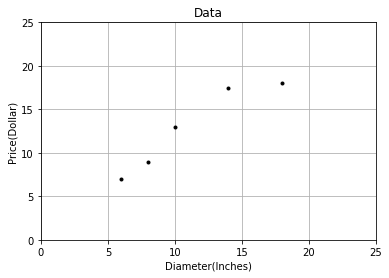

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt  
import numpy as np

#Plot 为绘图函数，同学们可以利用这个函数建立画布和基本的网格
def Plot():  
    plt.figure()  
    plt.title('Data')  
    plt.xlabel('Diameter(Inches)')  
    plt.ylabel('Price(Dollar)')  
    plt.axis([0,25,0,25])  
    plt.grid(True)
    return plt 


plt = Plot()

#X 为披萨的直径列表，Y 为披萨的价格列表  
X = [[6], [8], [10], [14], [18]]  
y = [[7], [9], [13], [17.5], [18]]  
 
plt.plot(X,y,'k.')

plt.show()


我们希望可以构建一个函数去预测披萨的价格，当我们输入披萨直径时，可以返回一个预测的披萨价格值。从散点图可以发现，披萨的价格与披萨直径之间存在一种近似的线性关系，这时我们可以构建一元线性回归模型：
 $$h_θ(x) = θ_0 + θ_1 x $$
 
上述公式中$h_θ(x)$为模型预测的披萨价格，$x$为披萨的直径，这样每给出一个输入值$x$，我们经过上述函数的计算，都能给出一个关于披萨价格的预测值。
 
当然，如果我们的特征$x$不止一个的话（譬如口味、原料总价格等），我们可以构造多元线性回归模型
 $$h_θ(x) = ∑θ_i x_i (i = 0,...,n , x_0 = 1)$$

线性回归是一种简单的模型，分为训练和预测两个步骤，在披萨店的例子中，给出一组披萨的直径$x$，其对应的实际价格为$y$。基于这样的一组$x$和$y$计算得到$θ$的过程，叫做**训练**。由于我们基于训练确定了$h_θ(x) = θ_0 + θ_1 x $这个估计方程，那么当给出其他的披萨的尺寸$x'$时，我们将$x'$代入估计方程便可预测出该披萨的价格，这样的过程叫做**预测**。

线性回归模型在回归拟合中受到广泛应用，比如预测商品价格，成本评估等，倘若初步观测到待估计的值（因变量）与因素值（自变量）之间存在一种近似线性的相关关系，我们便选用线性回归模型进行训练和预测。

## 2 算法分析
对于线性回归模型 $$h_θ(x) = θ_0 + θ_1 x $$

当我们有合适的$θ_1,θ_0$值的时候，对于每一个输入值$x$，我们就能比较准确的获得其估计值$h_θ(x)$，这里我们介绍最小二乘法，用来确定合适的$θ$值：

最小二乘法是勒让德( A. M. Legendre)于1805年在其著作《计算慧星轨道的新方法》中提出的。它的主要思想就是选择未知参数，使得理论值与观测值之差的平方和达到最小。

直观的去理解，如果对于一个待估计价格的披萨，它的尺寸为$x$英寸，实际价格为$y$美元，我们希望估计出来的价格$h_θ(x)$与实际的$y$值尽量的接近，我们基于最小二乘法的思想，定义一个损失函数:

$$J(θ) = \frac{1}{2m}\sum(h_θ(x(i)) − y(i))^2$$

m为训练数据的样本量,这样当不断改变$θ$的值，我们得到最小的损失函数值的时候，此时的$θ$便为最合适的值。

当然，损失函数可以有很多种定义方法，这种损失函数是最为经典的，一元线性回归其实就是去找到一条直线，这条直线能以最小的损失（Loss）来拟合数据,线性回归的结果也即是损失函数取得最小值的结果，以上述损失函数得到的线性回归模型称为普通最小二乘回归模型(OLS)

## 3 代码实现
在python中，sklearn中已经实现了许多回归模型，sklearn下linear_model模块便是对于线性模型的实现，LinearRegression便是基于OLS模型对于线性回归的实现，我们利用LinearRegression进行线性回归：

In [6]:
from sklearn.linear_model import LinearRegression

# 一个线性回归模型对象model，此时model内的theta参数并没有值
model = LinearRegression()

# 数据预处理
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)
# 利用model.fit（X, y），X为自变量，y为因变量
# 执行这一步之后，model中的 theta参数将变为基于输入的X, y在OLS模型下获得的训练值
model.fit(X, y)

# 对尺寸为12英寸的披萨价格进行预测
X_pre = [12]
X_pre = np.array(X_pre).reshape(-1,1)
print('匹萨价格预测值：$%.2f' % model.predict(X_pre)[0])

匹萨价格预测值：$13.68


在上述代码中，修改X_pre的值，可以对其他直径的披萨价格作预测，大家可以对其他尺寸的披萨尝试进行价格预测。这里我们分别对直径为0,10，14,25英寸的披萨利用训练的模型做价格预测，绘制预测出的模型曲线去实际的价格散点图：

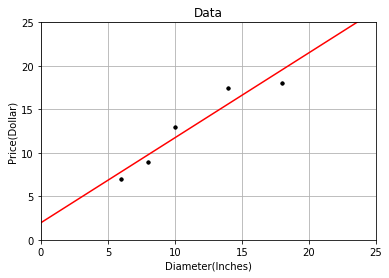

In [7]:
# 绘制网格
plt = Plot()

# 绘制实际的价格-直径对应的散点
plt.plot(X, y, 'k.')

# 对披萨直径为0,10,14,25英寸的披萨进行价格预测
X2 = [[0], [10], [14], [25]]

# 建立线性回归模型
model = LinearRegression()

# 模型训练
model.fit(X, y)

# 获得预测的披萨价格序列
y2 = model.predict(X2)


# 在网格上绘制原始数据散点，图中黑色散点
plt.plot(X, y, 'k.')

# 绘制预测的披萨价格-直径曲线，图中绿色直线
plt.plot(X2, y2, 'r-')
plt.show()

# 4 练习
在上一节的梯度下降法的试验中，大家已经初步通过使用梯度下降法找出最合适的$θ$值实现线性拟合，现在，利用给出的数据集，同时用你上节课实现的梯度下降法和本次试验中的sklearn模块下的LinearRegression对给出的数据进行线性回归，比较两种方法的效果：
本次实验的数据集为2005年至2015年城镇公交车运营数量（Buses，辆）以及人均国民生产总值(PGDP，元)，大家可以以2005-2012年的数据为训练集，2013-2015年的数据作为预测集进行模型的建立、预测与评估：

    Year     Bus   PGDP
0   1996  281516  11232
1   1997  313296  14368
2   1998  315576  16738
3   1999  347969  20505
4   2000  370640  24121
5   2001  371822  26222
6   2002  383161  30876
7   2003  412590  36403
8   2004  432021  40007
9   2005  460970  43852
10  2006  476255  47203
11  2007  502916  50251


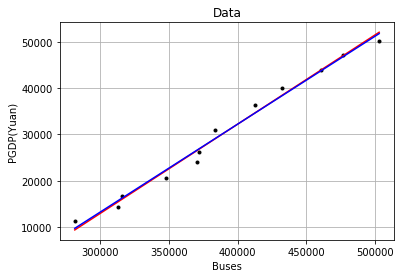

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt  
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
# 导入数据集
data = pd.read_csv('./Input/data.csv')
print(data)
# buses: 城镇公交车运营数量
buses = data['Bus']
# pdgp: 人均国民生产总值
pgdp = data['PGDP']
#Plot 为绘图函数，同学们可以利用这个函数建立画布和基本的网格
def Plot():  
    plt.figure()  
    plt.title('Data')  
    plt.xlabel('Buses')  
    plt.ylabel('PGDP(Yuan)')   
    plt.grid(True)
    return plt 

def function(x,theta):
    return theta[0]+theta[1]*x
def Gradient(x,y,theta):
    return np.dot(x.T, np.dot(x,theta) - y)
def gradient_desent(x,y,alpha,times): 
    theta = np.array(([-45000],[1]),dtype = np.int)
    gradient = Gradient(x,y,theta)
    for i in range(times):
        theta = theta - alpha*gradient
        gradient = Gradient(x,y,theta)
    return theta

x0 = np.ones(len(buses),dtype = np.int).reshape(-1,1)
buses = np.array(buses).reshape(-1,1)
pgdp = np.array(pgdp).reshape(-1,1)
x = np.hstack((x0,buses))
alpha =5e-13
times = 100
theta = gradient_desent(x,pgdp,alpha,times)

#使用LinearRegression对给出的数据进行线性回归
model = LinearRegression()
model.fit(buses, pgdp)
y2 = model.predict(buses)
# 绘制pgdp与buses之间的关系
plt = Plot()
plt.plot(buses, pgdp, 'k.')
y = function(buses,theta)
plt.plot(buses,y,'r-')
plt.plot(buses,y2,'b-')
plt.show()


In [24]:
def function(x,theta):
    return theta[0]+theta[1]*x
def Gradient(x,y,theta):
    return np.dot(x.T, np.dot(x,theta) - y)
def gradient_desent(x,y,alpha,times): 
    theta = np.array(([-100000],[1]),dtype = np.int)
    gradient = Gradient(x,y,theta)
    for i in range(times):
        theta = theta - alpha*gradient
        gradient = Gradient(x,y,theta)
    return theta

x0 = np.ones(len(buses),dtype = np.int).reshape(-1,1)
buses = np.array(buses).reshape(-1,1)
pgdp = np.array(pgdp).reshape(-1,1)
x = np.hstack((x0,buses))
alpha =5e-13
times = 10
theta = gradient_desent(x,pgdp,alpha,times)
print(theta)
times = 100000
theta = gradient_desent(x,pgdp,alpha,times)
print(theta)

[[-1.00000000e+05]
 [ 3.30411419e-01]]
[[-9.99999990e+04]
 [ 3.30411417e-01]]
